# Project Submission by Sujatha Patel

**Project Description: Twitter US Airline Sentiment**
#### *Data Description:*
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").
#### *Dataset:*
The project is from a dataset from Kaggle.
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
The dataset has to be downloaded from the above Kaggle website.
#### *The dataset has the following columns:*
 tweet_id
 airline_sentiment
 airline_sentiment_confidence
 negativereason
 negativereason_confidence
 airline
 airline_sentiment_gold
 name
 negativereason_gold
 retweet_count
 text
 tweet_coord
 tweet_created
 tweet_location
 user_timezone
#### *Objective*
To implement the techniques learnt as a part of the course.
#### *Learning Outcomes*
 Basic understanding of text pre-processing.
 What to do after text pre-processing:
o Bag of words
o Tf-idf
 Build the classification model.
 Evaluate the Model.
#### *Steps and tasks*
1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)
2. Understand of data-columns: (5 Marks)
a. Drop all other columns except “text” and “airline_sentiment”.
b. Check the shape of data.
c. Print first 5 rows of data.
3. Text pre-processing: Data preparation. (20 Marks)
a. Html tag removal.
b. Tokenization.
c. Remove the numbers.
d. Removal of Special Characters and Punctuations.
e. Conversion to lowercase.
f. Lemmatize or stemming.
g. Join the words in the list to convert back to text string in the dataframe. (So that each row
contains the data in text format.)
h. Print first 5 rows of data after pre-processing.
4. Vectorization: (10 Marks)
a. Use CountVectorizer.
b. Use TfidfVectorizer.
5. Fit and evaluate model using both type of vectorization. (6+6 Marks)
6. Summarize your understanding of the application of Various Pre-processing and Vectorization and
performance of your model on this dataset. (8 Marks)


In [1]:
#!pip install torch===1.4.0 torchvision===0.5.0 -f https://download.pytorch.org/whl/torch_stable.html

**Import the libraries, load dataset, print shape of data, data description.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")

In [4]:
!pip install contractions

In [5]:
# Import libraries.
import pandas as pd
import numpy as np
import nltk
import re 
import string
import unicodedata           
import contractions

# Natural language processing tool-kit
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from bs4 import BeautifulSoup                 
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    
from nltk.stem import LancasterStemmer, WordNetLemmatizer

import seaborn as sns
from matplotlib import pyplot as plt

from nltk.corpus import twitter_samples
from nltk.tokenize.casual import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [6]:
# Load dataset
twitter_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Tweets.csv")
twitter_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
# Shape of twitter_data
twitter_data.shape

(14640, 15)

In [8]:
# Describe twitter_data
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

---
                                                           twitter_data1

**Understand of data-columns**

**Drop all other columns except “text” and “airline_sentiment”**

In [9]:
# dropping all columns except 'text' and 'airline_sentiment'
twitter_data1 = twitter_data.loc[:14640, ['text', 'airline_sentiment']]

**Check the shape of data**


In [10]:
# shape of twitter_data1 (after dropping the unnecessary columns for sentiment analysis)
twitter_data1.shape

(14640, 2)

In [11]:
# Check for NULL values.
twitter_data1.isnull().sum(axis=0)  

text                 0
airline_sentiment    0
dtype: int64

**Print first 5 rows of data.**

In [12]:
# Display full inforamtion of the text columns 
pd.set_option('display.max_colwidth', None) 
twitter_data1.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [13]:
# Count by Sentiment
from collections import Counter
labels = np.array(twitter_data1.airline_sentiment)
Counter(labels)

Counter({'negative': 9178, 'neutral': 3099, 'positive': 2363})

Text(0, 0.5, 'No. of Tweets')

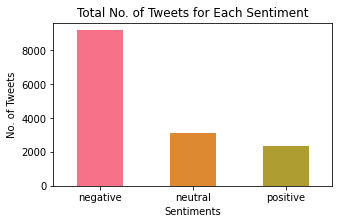

In [14]:
#Plotting the number of each type of sentiments 
colors=sns.color_palette("husl", 10)
pd.Series(twitter_data1["airline_sentiment"]).value_counts().plot(kind = "bar",
                                    color=colors,figsize=(5,3),rot=0, title = "Total No. of Tweets for Each Sentiment")
plt.xlabel('Sentiments', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

**63% Negative**
**21% Neutral**
**16% Positive**

**Text pre-processing: Data preparation**

* **HTML tag removal.**
* **Remove the numbers.**
* **Removal of Special Characters and Punctuations.**
* **Conversion to lowercase**

In [15]:
twitter_data1.loc[[50]] #shows the text with numbers (769), 
                        #special chars like @,?,",. 
                        #punctuations

,text,airline_sentiment
50,"@VirginAmerica Is flight 769 on it's way? Was supposed to take off 30 minutes ago. Website still shows ""On Time"" not ""In Flight"". Thanks.",neutral


In [16]:
twitter_data1.loc[[105]] #shows the text with special characters, emoji etc 

,text,airline_sentiment
105,"@VirginAmerica - amazing customer service, again! 💕💕 RaeAnn in SF - she's the best! #customerservice #virginamerica #flying",positive


In [17]:
twitter_data1.loc[[68]] #shows the winning later to be lametized as 'win' 

,text,airline_sentiment
68,@VirginAmerica Congrats on winning the @Travelzoo award for Best Deals from an Airline (US) http://t.co/kj1iljaebV,positive


In [18]:
twitter_data1.loc[[73]]

,text,airline_sentiment
73,@VirginAmerica your airline is awesome but your lax loft needs to step up its game. $40 for dirty tables and floors? http://t.co/hy0VrfhjHt,negative


In [19]:
def preprocess(text):
    text = contractions.fix(text)                        #Contractions like didnt replaced with did not 
    soup = BeautifulSoup(text, 'html.parser')            #html parser 
    text = soup.get_text()
    text = re.sub('\@(\w+)', " ", text).replace(": ","") #remove usernames
    text = re.sub('#(\w+)', " ", text)                   #remove hashtags
    text = text.replace("RT ","")                        #remove RT Symbols
    text = text.replace("RT: ","")                       #remove RT Symbols
    text = re.sub("[^a-zA-Z,]+", " ", text)              #remove other non-alpha characters (it includes removing the digtsor numbers as well)
    text = text.strip(" ")                               #remove leading and trailing whitespace
    text = re.sub(r'\W', ' ', text)                      #Remove all the special characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)          #Remove all single characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)           #Remove single characters from the start
    text = re.sub(r'\s+', ' ', text, flags=re.I)         #Substituting multiple spaces with single space
    text = re.sub(r'^b\s+', '', text)                    #Removing prefixed 'b'
    text = text.lower()                                  #Converting to Lowercase
    text = re.sub(r'^http?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE) #Remove http URL
    return text

---
                                                                     twitter_data2

In [20]:
twitter_data2 = twitter_data1.copy()
twitter_data2['text'] = twitter_data2.apply(lambda x: preprocess(x['text']), axis=1)
twitter_data2.head()

,text,airline_sentiment
0,what said,neutral
1,plus you have added commercials to the experience tacky,positive
2,i did not today must mean need to take another trip,neutral
3,it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse,negative
4,and it is really big bad thing about it,negative


In [21]:
twitter_data2.loc[[50]] 

,text,airline_sentiment
50,is flight on it is way was supposed to take off minutes ago website still shows on time not in flight thanks,neutral


*   Numbers removed
*   Punctuations removed
*   Non alphabetic character like "@", "." etc removed
*   Converted to lowercase
*   removed single letter as no value added for the analysis




In [22]:
twitter_data2.loc[[105]] #validate against special characters


,text,airline_sentiment
105,amazing customer service again raeann in sf she is the best,positive


In [23]:
twitter_data2.loc[[73]] #validate against http URLs 

,text,airline_sentiment
73,your airline is awesome but your lax loft needs to step up its game for dirty tables and floors http co hy vrfhjht,negative




*   Non Ascii character like emoji removed


* **Tokenization**

In [24]:
# Tokenization 
twitter_data2['text'] = twitter_data2.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
twitter_data2.head()

,text,airline_sentiment
0,"[what, said]",neutral
1,"[plus, you, have, added, commercials, to, the, experience, tacky]",positive
2,"[i, did, not, today, must, mean, need, to, take, another, trip]",neutral
3,"[it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[and, it, is, really, big, bad, thing, about, it]",negative


Tokenization separates the sentences into individual units called tokens.

* **Lemmatize**

In [25]:
lemmatizer = WordNetLemmatizer()
#Lemmatize
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

twitter_data2['text'] = twitter_data2.apply(lambda x: lemmatize_list(x['text']), axis=1)
twitter_data2.head()

,text,airline_sentiment
0,"[what, say]",neutral
1,"[plus, you, have, add, commercials, to, the, experience, tacky]",positive
2,"[i, do, not, today, must, mean, need, to, take, another, trip]",neutral
3,"[it, be, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, face, they, have, little, recourse]",negative
4,"[and, it, be, really, big, bad, thing, about, it]",negative


In [26]:
twitter_data2.loc[[68]]

,text,airline_sentiment
68,"[congrats, on, win, the, award, for, best, deal, from, an, airline, us, http, co, kj, iljaebv]",positive


*   Lammatizer changed 'winning' to win.


* **Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)** 

In [27]:
# join the words to back to text_string
def join_words(text):
    return ' '.join(text)

twitter_data2['text'] = twitter_data2.apply(lambda x: join_words(x['text']), axis=1)

* **Print first 5 rows of data after pre-processing**

In [28]:
twitter_data2.head()

,text,airline_sentiment
0,what say,neutral
1,plus you have add commercials to the experience tacky,positive
2,i do not today must mean need to take another trip,neutral
3,it be really aggressive to blast obnoxious entertainment in your guests face they have little recourse,negative
4,and it be really big bad thing about it,negative


**Fit and evaluate model using both type of vectorization.**

**Vectorization**

**CountVectorizer**


In [29]:
#Count Vectorizer to convert text to numbers 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()                
Count_Vectorizer = cv.fit_transform(twitter_data2['text'])
Count_Vectorizer  = Count_Vectorizer.toarray() 

In [30]:
Count_Vectorizer.shape


(14640, 9839)

**TfidfVectorizer**


In [31]:
#Tfid Vectorizer to convert text to numbers
from sklearn.feature_extraction.text import TfidfVectorizer 

tv = TfidfVectorizer()
Tfid_Vectorizer = tv.fit_transform(twitter_data2['text'])
Tfid_Vectorizer = Tfid_Vectorizer.toarray() 

**Model Buidling: CountVectorizer & TfidVectorizer**


In [32]:
labels=twitter_data2['airline_sentiment'].apply(lambda x: 0 if x=='negative' else (1 if x=='positive' else 2))
labels = labels.astype('int')

In [33]:
labels

0        2
1        1
2        2
3        0
4        0
        ..
14635    1
14636    0
14637    2
14638    0
14639    2
Name: airline_sentiment, Length: 14640, dtype: int64

In [36]:
def run_model(model_name,X_train,y_train,X_test,y_test,cv_if):
     print("***************************",model_name,"**************************\n")
     if model_name == "randomforest":
        model = RandomForestClassifier(n_estimators=10, n_jobs=4)
     elif model_name == "adaboost":
        model = AdaBoostClassifier()

     model = model.fit(X_train, y_train)
     train_score = np.mean(cross_val_score(model, cv_if, labels, cv=10))
     print("Train score:", train_score)

     pred_outcome = model.predict(X_test)
     test_score = model.score(X_test,y_test)
     print("Test score:", test_score)

     print("\n\n Confusion Matrix:\n")
     cm = confusion_matrix(y_test, pred_outcome)  
     print(cm)
     df_cm = pd.DataFrame(cm)
     plt.figure(figsize = (5,3))
     
     sns.heatmap(df_cm, annot=True, fmt='g')
     print("\n\nClassification Report:\n")
     cr=metrics.classification_report(y_test,pred_outcome)
     print(cr)

     return    

In [35]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [34]:
# Split data into training and testing set (Count_Vectorizer).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Count_Vectorizer, labels, test_size=0.3, random_state=20)


*************************** randomforest **************************

Train score: 0.7362704918032786
Test score: 0.7509107468123861


 Confusion Matrix:

[[2583   40  127]
 [ 284  355   95]
 [ 479   69  360]]


Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      2750
           1       0.77      0.48      0.59       734
           2       0.62      0.40      0.48       908

    accuracy                           0.75      4392
   macro avg       0.72      0.61      0.64      4392
weighted avg       0.74      0.75      0.73      4392



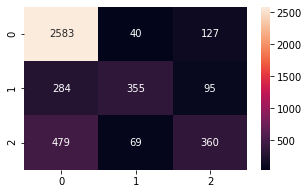

In [37]:
run_model("randomforest",X_train,y_train,X_test,y_test,Count_Vectorizer)

In [58]:
 result = pd.DataFrame({'Dataset' : ['Count Vectorizer data'],
                        'Model' : ['RandomForestClassifier'], 
                        'cross_val_Score' :'0.74',
                        'Testing_Score' :'0.75',
                        'Negative Sentiment(Precision)' :'0.77',
                        'Negative Sentiment(Recall)' :'0.94',
                        'Negative Sentiment(F1-Score)' :'0.85',
                        'Positive Sentiment(Precision)' :'0.77',
                        'Positive Sentiment(Recall)' :'0.48',
                        'Positive Sentiment(F1-Score)' :'0.59',
                        'Neutral Sentiment(Precision)' :'0.62',
                        'Neutral Sentiment(Recall)' :'0.40',
                        'Neutral Sentiment(F1-Score)' :'0.48'
                      })

*************************** adaboost **************************

Train score: 0.7415983606557377
Test score: 0.7459016393442623


 Confusion Matrix:

[[2388   92  270]
 [ 185  435  114]
 [ 379   76  453]]


Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2750
           1       0.72      0.59      0.65       734
           2       0.54      0.50      0.52       908

    accuracy                           0.75      4392
   macro avg       0.69      0.65      0.67      4392
weighted avg       0.74      0.75      0.74      4392



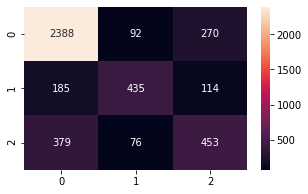

In [39]:
run_model("adaboost",X_train,y_train,X_test,y_test,Count_Vectorizer)

In [59]:
 result.loc[1] = ['Count Vectorizer data','AdaBoostClassifier','0.74','0.75','0.81','0.87','0.84','0.72','0.59','0.65','0.54','0.50','0.52']

In [47]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Tfid_Vectorizer, labels, test_size=0.3, random_state=30)


*************************** randomforest **************************

Train score: 0.7280737704918032
Test score: 0.7336065573770492


 Confusion Matrix:

[[2611   26  114]
 [ 350  279   83]
 [ 547   50  332]]


Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      2751
           1       0.79      0.39      0.52       712
           2       0.63      0.36      0.46       929

    accuracy                           0.73      4392
   macro avg       0.72      0.57      0.60      4392
weighted avg       0.73      0.73      0.70      4392



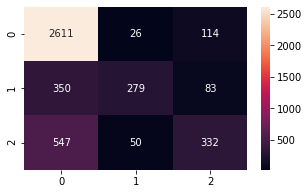

In [48]:
run_model("randomforest",X_train,y_train,X_test,y_test,Tfid_Vectorizer)

In [60]:
 result.loc[2] = ['Tfid Vectorizer data','RandomForestClassifier','0.73','0.74','0.74','0.95','0.83','0.79','0.39','0.52','0.63','0.36','0.46']

*************************** adaboost **************************

Train score: 0.7352459016393442
Test score: 0.7342896174863388


 Confusion Matrix:

[[2352  101  298]
 [ 200  420   92]
 [ 405   71  453]]


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      2751
           1       0.71      0.59      0.64       712
           2       0.54      0.49      0.51       929

    accuracy                           0.73      4392
   macro avg       0.68      0.64      0.66      4392
weighted avg       0.73      0.73      0.73      4392



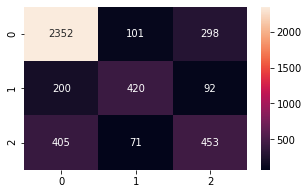

In [50]:
run_model("adaboost",X_train,y_train,X_test,y_test,Tfid_Vectorizer)


In [61]:
result.loc[3] = ['Tfid Vectorizer data','AbaBoostClassifier','0.74','0.73','0.80','0.85','0.82','0.71','0.59','0.64','0.54','0.49','0.51']

**Summary:**
*Below Pre Procesing steps performed on the sentiment text*
* HTML Tag Removal
* Contractions like didnt replaced with did not 
* Handled html parser (but none found) 
* Removal usernames
* Removal hashtags
* Removal RT Symbols
* Removal other non-alpha characters (it includes removing the digtsor numbers as well)
* Removal of leading and trailing whitespace
* Removal of all the special characters
* Removal all single characters
* Removal single characters from the start
* Substituting multiple spaces with single space
* Removal of http URLs
* Converted to Lowercase
* Lemmatization
* joined the words back to the list
* tokenized


After Pre Processing and Vectorization , Random Forest and AdaBoost Models were bulid for prediciting sentiments

In [62]:
result.T

,0,1,2,3
Dataset,Count Vectorizer data,Count Vectorizer data,Tfid Vectorizer data,Tfid Vectorizer data
Model,RandomForestClassifier,AdaBoostClassifier,RandomForestClassifier,AbaBoostClassifier
cross_val_Score,0.74,0.74,0.73,0.74
Testing_Score,0.75,0.75,0.74,0.73
Negative Sentiment(Precision),0.77,0.81,0.74,0.80
Negative Sentiment(Recall),0.94,0.87,0.95,0.85
Negative Sentiment(F1-Score),0.85,0.84,0.83,0.82
Positive Sentiment(Precision),0.77,0.72,0.79,0.71
Positive Sentiment(Recall),0.48,0.59,0.39,0.59
Positive Sentiment(F1-Score),0.59,0.65,0.52,0.64


From the above models we have 
* an accuracy of more than 73% and 
* F1 score for negative sentiments are (above 82%) 
* F1 score for positive sentiments are (52%-65%) and 
* F1 score for netural sentiments are (46%-52%).

**Overall, F1 Score of negative sentiment is high for Randomforest and AdaBoostClassifier with CounterVectorizer though the positive and neutral scores are lower to other models.** 

**But, we would give higher weightage for the negativity to ensure that the negative sentiments when compared with false positive/neutral sentments.**

# End Of Project